In [75]:
%pylab inline
import sys
sys.path.append('../src/')
from utils import *

Populating the interactive namespace from numpy and matplotlib


/home/isaac/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
comb = pd.concat((train.drop('SalePrice', axis=1), test)).set_index('Id')

In [68]:
cols = list(comb.columns)
list(comb.columns[comb.isnull().any(axis=0)])

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

## Masonry Columns

In [69]:
mas = ['MasVnrType', 'MasVnrArea']
[comb[m].isnull().sum() for m in mas]

[24, 23]

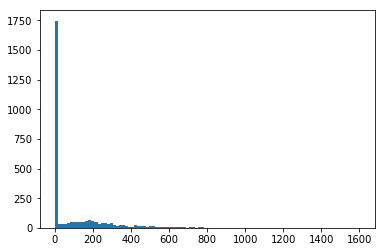

In [78]:
hist(comb.MasVnrArea[~comb.MasVnrArea.isnull()].values, 100);

In [82]:
comb[(comb.MasVnrArea == 0) & ~comb.MasVnrType.isnull() & ~(comb.MasVnrType=='None')].MasVnrType

Id
689     BrkFace
1242      Stone
2320    BrkFace
Name: MasVnrType, dtype: object

In [84]:
comb.groupby('MasVnrType').YearBuilt.median()

MasVnrType
BrkCmn     1961
BrkFace    1990
None       1962
Stone      2006
Name: YearBuilt, dtype: int64

In [72]:
comb[comb.MasVnrType.isnull() & ~comb.MasVnrArea.isnull()].iloc[0]

MSSubClass            20
MSZoning              RL
LotFrontage          124
LotArea            27697
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     Mitchel
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        1Story
OverallQual            4
OverallCond            3
YearBuilt           1961
YearRemodAdd        1961
RoofStyle           Shed
RoofMatl         CompShg
Exterior1st      Plywood
Exterior2nd      Plywood
MasVnrType           NaN
MasVnrArea           198
ExterQual             TA
ExterCond             TA
Foundation        CBlock
BsmtQual              TA
                  ...   
HalfBath               0
BedroomAbvGr           3
KitchenAbvGr           1
KitchenQual           TA
TotRmsAbvGrd           6
Functional           Typ
Fireplaces             0
FireplaceQu          NaN
GarageType        Attchd


## Basement Columns

In [31]:
bsmt = [x for x in cols if 'Bsmt' in x]

In [32]:
train[bsmt].isnull().any(axis=0)

BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
BsmtFinSF1      False
BsmtFinType2     True
BsmtFinSF2      False
BsmtUnfSF       False
TotalBsmtSF     False
BsmtFullBath    False
BsmtHalfBath    False
dtype: bool

In [33]:
bsmtnums = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

In [34]:
comb[bsmtnums] = comb[bsmtnums].fillna(0)

In [35]:
bsmtna = list(comb[bsmt].columns[comb[bsmt].isnull().any(axis=0)])

In [36]:
bsmtna

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [39]:
allna = comb[bsmtna].isnull().all(axis=1)
anyna = comb[bsmtna].isnull().any(axis=1)
comb[bsmtna][anyna & ~allna]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
333,Gd,TA,No,GLQ,NaN
949,Gd,TA,NaN,Unf,Unf
1488,Gd,TA,NaN,Unf,Unf
2041,Gd,NaN,Mn,GLQ,Rec
2186,TA,NaN,No,BLQ,Unf
2218,NaN,Fa,No,Unf,Unf
2219,NaN,TA,No,Unf,Unf
2349,Gd,TA,NaN,Unf,Unf
2525,TA,NaN,Av,ALQ,Unf


In [23]:
# Row 2349 should have BsmtExposure = 'No'
comb[(comb.BsmtCond == 'TA') & (comb.BsmtFinType2 =='Unf') &
     (comb.BsmtQual=='Gd') & (comb.BsmtFinType1 == 'Unf')] \
    .groupby('BsmtExposure').Id.count()

BsmtExposure
Av     58
Gd     10
Mn     22
No    255
Name: Id, dtype: int64

In [15]:
# BsmtExposure should probably be 'No' in rows 949 and 1488
comb[(comb.BsmtQual == 'Gd') & (comb.BsmtCond=='TA') &
     (comb.BsmtFinType2=='Unf') & (comb.BsmtFinType1 == 'Unf')] \
    .groupby('BsmtExposure').Id.count()

BsmtExposure
Av     58
Gd     10
Mn     22
No    255
Name: Id, dtype: int64

In [22]:
# Row 2219 should have BsmtQual = 'TA'?
comb[(comb.BsmtCond == 'TA') & (comb.BsmtFinType2 =='Unf') &
     (comb.BsmtExposure=='No') & (comb.BsmtFinType1 == 'Unf')] \
    .groupby('BsmtQual').Id.count()

BsmtQual
Ex     20
Fa     38
Gd    255
TA    304
Name: Id, dtype: int64

In [21]:
# Row 2218 should have BsmtQual = 'TA'?
comb[(comb.BsmtCond == 'Fa') & (comb.BsmtFinType2 =='Unf') &
     (comb.BsmtExposure=='No') & (comb.BsmtFinType1 == 'Unf')] \
    .groupby('BsmtQual').Id.count()

BsmtQual
Fa    13
Gd     2
TA    31
Name: Id, dtype: int64

In [20]:
# Row 2525 should have BsmtCond = 'TA'
comb[(comb.BsmtQual == 'TA') & (comb.BsmtFinType2 =='Unf') &
     (comb.BsmtExposure=='Av') & (comb.BsmtFinType1 == 'ALQ')] \
    .groupby('BsmtCond').Id.count()

BsmtCond
Gd     1
TA    28
Name: Id, dtype: int64

In [17]:
# Row 2186 should have BsmtCond = 'TA'
comb[(comb.BsmtQual == 'TA') & (comb.BsmtFinType2 =='Unf') &
     (comb.BsmtExposure=='No') & (comb.BsmtFinType1 == 'BLQ')] \
    .groupby('BsmtCond').Id.count()

BsmtCond
Fa      7
Gd      2
TA    121
Name: Id, dtype: int64

In [16]:
# Row 2041 should have BsmtCond = 'TA'
comb[(comb.BsmtQual == 'Gd') & (comb.BsmtFinType2 =='Rec') &
     (comb.BsmtExposure=='Mn') & (comb.BsmtFinType1 == 'GLQ')] \
    .groupby('BsmtCond').Id.count()

BsmtCond
TA    1
Name: Id, dtype: int64

In [14]:
# Clearly BsmtFinType2 should be 'Unf' in row 333
comb[(comb.BsmtQual == 'Gd') & (comb.BsmtCond=='TA') &
     (comb.BsmtExposure=='No') & (comb.BsmtFinType1 == 'GLQ')] \
    .groupby('BsmtFinType2').Id.count()

BsmtFinType2
ALQ      6
BLQ      1
LwQ      2
Rec      3
Unf    242
Name: Id, dtype: int64

In [24]:
# To summarize so far:
# (Id, col): value
tofill = {
    (949, 'BsmtExposure'): 'No',
    (1488,'BsmtExposure'): 'No',
    (333, 'BsmtfinType2'): 'Unf',
    (2041,'BsmtCond'):     'TA',
    (2186,'BsmtCond'):     'TA',
    (2525,'BsmtCond'):     'TA',
    (2349,'BsmtExposure'): 'No',
}

In [45]:
# Still unsure: BsmtQual in 2218 and 2219
comb.ix[[2218,2219]][bsmtnums]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,
2218,0.0,0.0,173.0,173.0,0.0,0.0
2219,0.0,0.0,356.0,356.0,0.0,0.0


In [64]:
# 'Fa' basements tend to be smaller than 'TA' basements, and these basements are small.
# However, 'TA' basements are more common in general, and in other situations with similar
# categoricals. Best bet is probably to label them 'TA'.
comb[(comb.BsmtUnfSF == comb.TotalBsmtSF)] \
    .groupby('BsmtQual').TotalBsmtSF.agg(['count', 'mean'])

,count,mean
BsmtQual,,
Ex,56,1443.553571
Fa,60,655.500000
Gd,364,1048.774725
TA,369,877.994580


In [65]:
tofill[(2218, 'BsmtQual')] = 'TA'
tofill[(2219, 'BsmtQual')] = 'TA'